In [1]:
from sklearn.metrics import roc_auc_score
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.manifold import TSNE
import datetime
parseDate = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

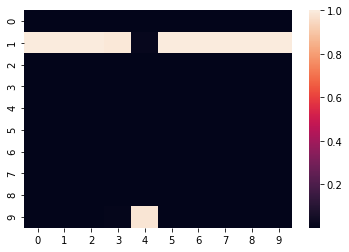

In [3]:
weight = np.array([[1.4173e-25, 2.7712e-14, 5.5190e-16, 3.9965e-08, 1.4493e-05, 6.0077e-20,
         6.5699e-13, 9.6490e-24, 7.2075e-12, 9.1302e-17],
        [1.0000e+00, 9.9999e-01, 9.9988e-01, 9.9030e-01, 1.5859e-02, 9.9999e-01,
         9.9984e-01, 1.0000e+00, 9.9996e-01, 9.9999e-01],
        [2.2591e-16, 1.4240e-07, 8.0699e-10, 2.8928e-04, 1.0852e-05, 5.8097e-13,
         3.6011e-07, 4.5478e-16, 2.4884e-06, 3.9052e-10],
        [7.3368e-08, 1.2193e-05, 1.1501e-04, 9.0551e-05, 3.6417e-07, 6.8999e-06,
         1.5799e-04, 1.8705e-06, 3.0634e-05, 1.2751e-05],
        [6.1318e-29, 1.8117e-17, 2.9636e-18, 6.4040e-11, 2.1265e-09, 6.5603e-23,
         2.7329e-15, 7.4507e-27, 1.6085e-14, 1.1631e-19],
        [9.9156e-19, 1.1819e-09, 2.9615e-12, 1.0214e-04, 1.5845e-03, 2.3876e-15,
         2.6935e-09, 1.3332e-18, 9.2225e-08, 2.3226e-12],
        [3.5895e-26, 4.0936e-15, 1.0693e-15, 1.1137e-08, 3.6939e-06, 5.7404e-20,
         4.8141e-13, 1.4096e-23, 9.3095e-13, 4.4536e-17],
        [1.3052e-27, 3.9040e-16, 3.3878e-18, 5.2927e-10, 1.0918e-08, 1.9951e-22,
         7.3118e-15, 2.6113e-26, 2.0944e-13, 5.3183e-19],
        [2.7504e-18, 1.4696e-10, 4.8175e-11, 2.4668e-06, 1.4501e-05, 4.8126e-14,
         3.8513e-09, 1.3889e-16, 4.7189e-09, 4.9441e-12],
        [3.2635e-14, 3.6492e-07, 4.1702e-09, 9.2200e-03, 9.8251e-01, 2.0252e-11,
         8.3308e-07, 5.6514e-14, 1.0214e-05, 3.8107e-09]])
sns.heatmap(weight)

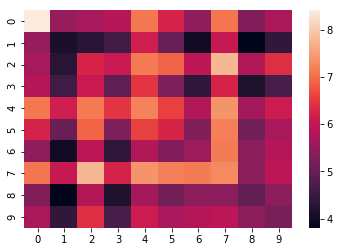

In [5]:
distance = np.array([[8.4063, 5.5383, 5.7067, 5.8469, 7.1018, 6.2481, 5.4748, 7.0890, 5.3014,
         5.7533],
        [5.5383, 4.1145, 4.3023, 4.5794, 6.1543, 5.0321, 3.9892, 6.0670, 3.8042,
         4.4030],
        [5.7067, 4.3023, 6.2497, 6.0850, 7.1221, 6.9021, 5.9265, 7.7837, 5.8239,
         6.3754],
        [5.8469, 4.5794, 6.0850, 4.9497, 6.4592, 5.2732, 4.3788, 6.2382, 4.1707,
         4.6976],
        [7.1018, 6.1543, 7.1221, 6.4592, 7.2176, 6.5770, 5.8330, 7.3905, 5.6589,
         6.1064],
        [6.2481, 5.0321, 6.9021, 5.2732, 6.5770, 6.2622, 5.3017, 7.1689, 5.1547,
         5.7186],
        [5.4748, 3.9892, 5.9265, 4.3788, 5.8330, 5.3017, 5.5970, 7.1322, 5.4368,
         5.8386],
        [7.0890, 6.0670, 7.7837, 6.2382, 7.3905, 7.1689, 7.1322, 7.2852, 5.4212,
         5.9374],
        [5.3014, 3.8042, 5.8239, 4.1707, 5.6589, 5.1547, 5.4368, 5.4212, 4.9707,
         5.4286],
        [5.7533, 4.4030, 6.3754, 4.6976, 6.1064, 5.7186, 5.8386, 5.9374, 5.4286,
         5.2240]])
sns.heatmap(distance)


In [9]:
distance.argmin(axis=0)

array([8, 8, 1, 8, 8, 1, 1, 8, 1, 1], dtype=int64)

In [7]:
distance.sum(axis=1)

array([62.4666, 47.9843, 62.2774, 52.6787, 65.6208, 59.6386, 54.9086,
       67.5133, 51.1711, 55.4829])

In [20]:
weight[0,:].sum()

61.4695

In [6]:
weight.shape

(12, 12)

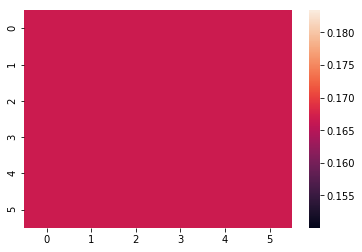

In [2]:
weight = np.array([[0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]])
sns.heatmap(weight)

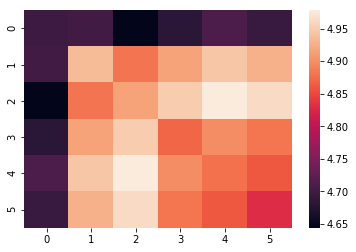

In [3]:
distance = np.array([[4.6982, 4.7017, 4.6441, 4.6808, 4.7106, 4.6945],
        [4.7017, 4.9359, 4.8813, 4.9161, 4.9442, 4.9282],
        [4.6441, 4.8813, 4.9157, 4.9497, 4.9779, 4.9628],
        [4.6808, 4.9161, 4.9497, 4.8706, 4.8984, 4.8824],
        [4.7106, 4.9442, 4.9779, 4.8984, 4.8775, 4.8617],
        [4.6945, 4.9282, 4.9628, 4.8824, 4.8617, 4.8300]])
sns.heatmap(distance)


In [11]:
def softmax(x, axis=None):
    x = x - x.max(axis=axis, keepdims=True)
    y = np.exp(x)
    return y / y.sum(axis=axis, keepdims=True)

array([0.04254255, 0.02830173, 0.05223328, 0.04321302, 0.03069873,
       0.04768734])

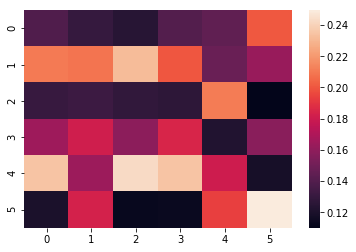

In [17]:
weight_test = np.random.rand(weight.shape[0],weight.shape[1])
weight_test = softmax(weight_test,axis=0)
sns.heatmap(weight_test)
weight_test.std(axis=0)

In [18]:
weight_test

array([[0.13900525, 0.130071  , 0.12430953, 0.14006741, 0.14451675,
        0.20085245],
       [0.21056604, 0.20870259, 0.23240283, 0.1999243 , 0.1479504 ,
        0.16297277],
       [0.1304629 , 0.13214326, 0.12802743, 0.12671703, 0.21080844,
        0.11003855],
       [0.1647189 , 0.18185336, 0.15914581, 0.18465052, 0.12253996,
        0.15841913],
       [0.23512255, 0.16411204, 0.2430398 , 0.23495883, 0.18063135,
        0.1182983 ],
       [0.12012436, 0.18311775, 0.11307459, 0.1136819 , 0.1935531 ,
        0.24941881]])

In [23]:
weight_test = np.zeros((weight.shape[0],weight.shape[1]))
weight_test[0,:] = 1

In [29]:
weight_test

array([[1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [30]:
weight_test.std(axis=0)

array([0.372678, 0.372678, 0.372678, 0.372678, 0.372678, 0.372678])

In [ ]:
tensor = torch